In [1]:
import pandas as pd

In [2]:
#Loading Dataset
survey_raw_df=pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
len(survey_raw_df.columns)

61

In [7]:
schema_fname=pd.read_csv('survey_results_schema.csv',index_col='Column')

In [8]:
schema_raw=schema_fname['QuestionText']

In [9]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation & Cleaning 

#### While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents & the global programming community 
- Distribution of programming skills, experiences and preferences
- Employment related information, preferences and opinions

In [10]:
selected_columns=[
    #Demographics
    'Country','Age','Gender','EdLevel', 'UndergradMajor',
    #Programming Experience   
    'YearsCodePro', 'Hobbyist', 'Age1stCode', 'LanguageDesireNextYear', 'YearsCode','LanguageWorkedWith','NEWLearn','NEWStuck',
    #Employment
    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors', 'NEWOvertime','NEWEdImpt'
]

In [11]:
len(selected_columns)

20

Now I extract copy of the data from these columns into a new data frame survey_df, which we can continue to modify without affecting the original data frame.

In [12]:
survey_df=survey_raw_df[selected_columns].copy()

In [13]:
schema=schema_raw[selected_columns]

In [14]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,YearsCodePro,Hobbyist,Age1stCode,LanguageDesireNextYear,YearsCode,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",27,Yes,13,C#;HTML/CSS;JavaScript,36,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",4,No,19,Python;Swift,7,JavaScript;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,NaN,Yes,15,Objective-C;Python;Swift,4,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",4,Yes,18,NaN,7,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",8,Yes,16,Java;Ruby;Scala,15,HTML/CSS;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Less than 1 year,Yes,16,NaN,10,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,NaN,Yes,NaN,HTML/CSS;Java;JavaScript,NaN,HTML/CSS,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
YearsCodePro              NOT including education, how many years have y...
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
YearsCode                 Including any education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [16]:
len(schema)

20

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   YearsCodePro            46349 non-null  object 
 6   Hobbyist                64416 non-null  object 
 7   Age1stCode              57900 non-null  object 
 8   LanguageDesireNextYear  54113 non-null  object 
 9   YearsCode               57684 non-null  object 
 10  LanguageWorkedWith      57378 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented by NaN.

Only two of the columns were detected as numeric columns ( Age and WorkWeekHrs ), even though there are a few other columns which have mostly numeric values. To make my analysis easier, I will convert some other columns into numeric data types. 

In [18]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [19]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [20]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [21]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [22]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [23]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [24]:
#converting into numeric values
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

#### Basic Statistics

In [25]:
survey_df.describe()

,Age,YearsCodePro,Age1stCode,YearsCode,WorkWeekHrs
count,45446.000000,44133.000000,57473.000000,56784.000000,41151.000000
mean,30.834111,8.869667,15.476572,12.782051,40.782174
std,9.585392,7.759961,5.114081,9.490657,17.816383
min,1.000000,1.000000,5.000000,1.000000,1.000000
25%,24.000000,3.000000,12.000000,6.000000,40.000000
50%,29.000000,6.000000,15.000000,10.000000,40.000000
75%,35.000000,12.000000,18.000000,17.000000,44.000000
max,279.000000,50.000000,85.000000,50.000000,475.000000


There seems to be a problem with the age column , as the minimum value is 1 and max value is 279. This is a common issues with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the values in the age column is higher than 100 years or lower than 10 years as invalid survey responses. 

In [26]:
#outlier 
survey_df[survey_df['Age']>100].index

Int64Index([14375], dtype='int64')

In [27]:
#outliers
survey_df[survey_df['Age']<10].index

Int64Index([8793, 11600, 12271, 20042, 25061, 26952, 54687, 58292, 64383], dtype='int64')

In [28]:
#Removing Outliers
survey_df.drop(survey_df[survey_df['Age']>100].index,inplace=True)
survey_df.drop(survey_df[survey_df['Age']<10].index,inplace=True)

The same hold true for WorkWeekHrs. Lets ignore entries where the value for the column is higher than 140 hours (~20 hours per day).

In [29]:
survey_df.drop(survey_df[survey_df['WorkWeekHrs']>140].index,inplace=True)

 The gender column also allows picking multiple options, but to simplify our analysis, we'll remove values containing multiple options.

In [30]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [31]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [32]:
import numpy as np

In [33]:
survey_df.where(~(survey_df['Gender'].str.contains(';',na=False)),np.nan,inplace=True)

In [34]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

 I've now cleaned up and prepared the dataset for analysis. Let's now look at the sample of rows from the data frame.

In [35]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,YearsCodePro,Hobbyist,Age1stCode,LanguageDesireNextYear,YearsCode,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
43967,Kenya,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Java,NaN,HTML/CSS;JavaScript;Python;SQL,Every few months,NaN,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN
59333,United Kingdom,38.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Yes,23.0,Bash/Shell/PowerShell;Dart;HTML/CSS;PHP;SQL;VBA,10.0,Java;Python,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
49735,United Kingdom,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",12.0,Yes,10.0,Haskell;HTML/CSS;Kotlin;Rust;TypeScript,16.0,Bash/Shell/PowerShell;C;C#;Go;Haskell;HTML/CSS...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...",37.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Never,Not at all important/not necessary
11636,Norway,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",7.0,Yes,14.0,Kotlin,10.0,C#;Kotlin,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, mobile",37.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Never,Very important
32253,United States,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",18.0,Yes,12.0,C#;HTML/CSS;JavaScript;PHP;SQL,22.0,C#;HTML/CSS;Java;JavaScript;PHP;SQL,Once a year,Watch help / tutorial videos;Visit another dev...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",60.0,Very satisfied,Specific department or team I’d be working on;...,Sometimes: 1-2 days per month but less than we...,Somewhat important
11986,Italy,35.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",13.0,Yes,6.0,C;TypeScript,20.0,C;HTML/CSS;JavaScript;TypeScript,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, embedded applic...",30.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Very important
39880,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Yes,13.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important
23512,Canada,51.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",27.0,Yes,13.0,C#;C++;Python;TypeScript,35.0,C#,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, desktop or enterprise applications;...",37.5,Very satisfied,Flex time or a flexible schedule;How widely us...,Occasionally: 1-2 days per quarter but less th...,Very important
28727,India,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",8.0,Yes,20.0,Java;JavaScript;Scala,9.0,Bash/Shell/PowerShell;C;C++;Java,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
43610,Singapore,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Once a year,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis and Visualization

Before we ask interesting questions about the survey responses, it would help to understand what the demographics i.e. country, age, gender, education level, employment level etc. of the respondents looks like. Its important to explore these variables in order to understand how representative the survey is of the worldwide programming community, as a survey of this scale generally tends to have some selection bias.

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

### Country

Counting total number of countries from which there are responses in the survey and plotting top 15 countries with highest response.

In [37]:
schema['Country']

'Where do you live?'

In [38]:
survey_df['Country'].nunique()

183

In [39]:
top_countries=survey_df['Country'].value_counts().head(15)
print(top_countries)

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64


We can visualize this information using bar charts

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


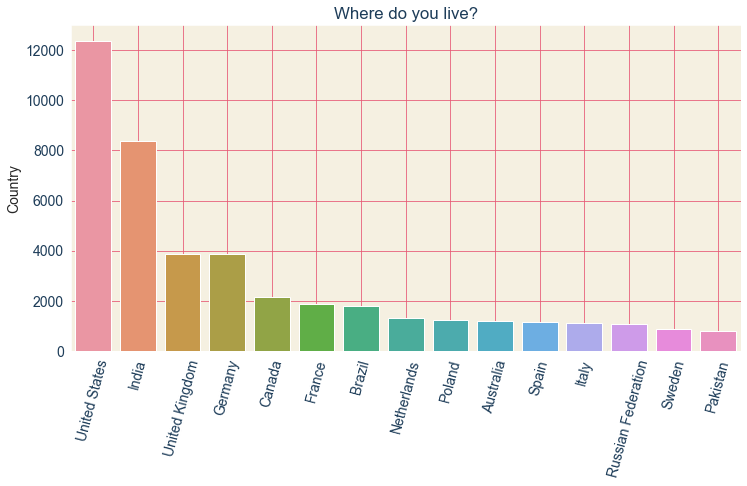

In [40]:
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_facecolor('#f5f0e1')
plt.xticks(rotation=75,color='#1e3d59')
plt.yticks(color='#1e3d59')
plt.title(schema.Country,color='#1e3d59')
sns.barplot(top_countries.index,top_countries)
plt.grid(color='#e75874')
plt.show()

 It appears that a high number of respondents are from USA and India - which one might expect since these countries have the highest population (apart from China), and since the survey is in English, which is the common language used by professionals in US, India & UK. We can already see that the survey may not be representative of the entire programming community - especially from non-English speaking countries.

### Age

The distribution of the age of respondents is another important factor to look at, and we can use a histogram to visualize it.

In [41]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

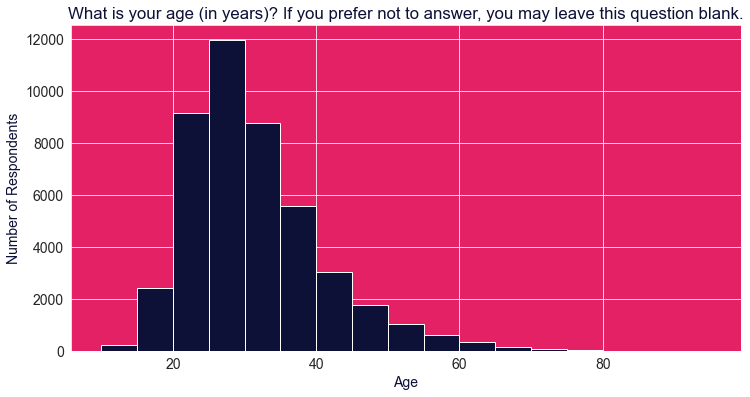

In [42]:
plt.figure(figsize=(12,6))
ax=plt.gca()
ax.set_facecolor('#e52165')
plt.title(schema.Age,color='#0d1137')
plt.xlabel('Age',color='#0d1137')
plt.ylabel('Number of Respondents',color='#0d1137')
plt.hist(survey_df.Age,bins=np.arange(10,100,5),color='#0d1137')
plt.show()

It appears that a large percentage of respondents are in the age range of 20-45, which is somewhat representative of the programming community in general, as a lot of people has taken up computer as a field of study or profession in last 20 years.

### Gender

Lets look at the distribution of responses of gender . It is a well known fact that women and non-binary gender are under representative in the programming community, so we might expect to see a skewed distribution here.

In [43]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [44]:
gender_counts=survey_df['Gender'].value_counts()

In [45]:
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

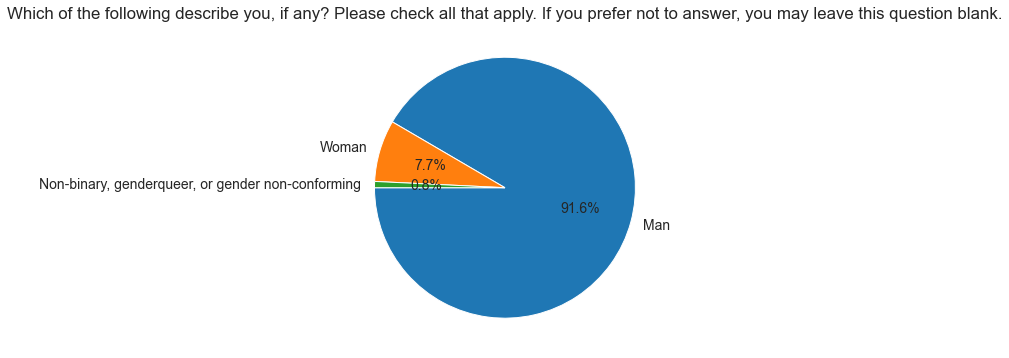

In [46]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180)
plt.plot(gender_counts)
plt.show()

Only about 8% of survey respondents who have answered the question identify as women or non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

 Formal education in computer science is often considered an important requirement of becoming a programmer. Lets see if this indeed the case, especially since there are many free resources & tutorials available online to learn programming. We will use a horizontal bar plot to compare education levels of respondents.

In [47]:
schema['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed?'

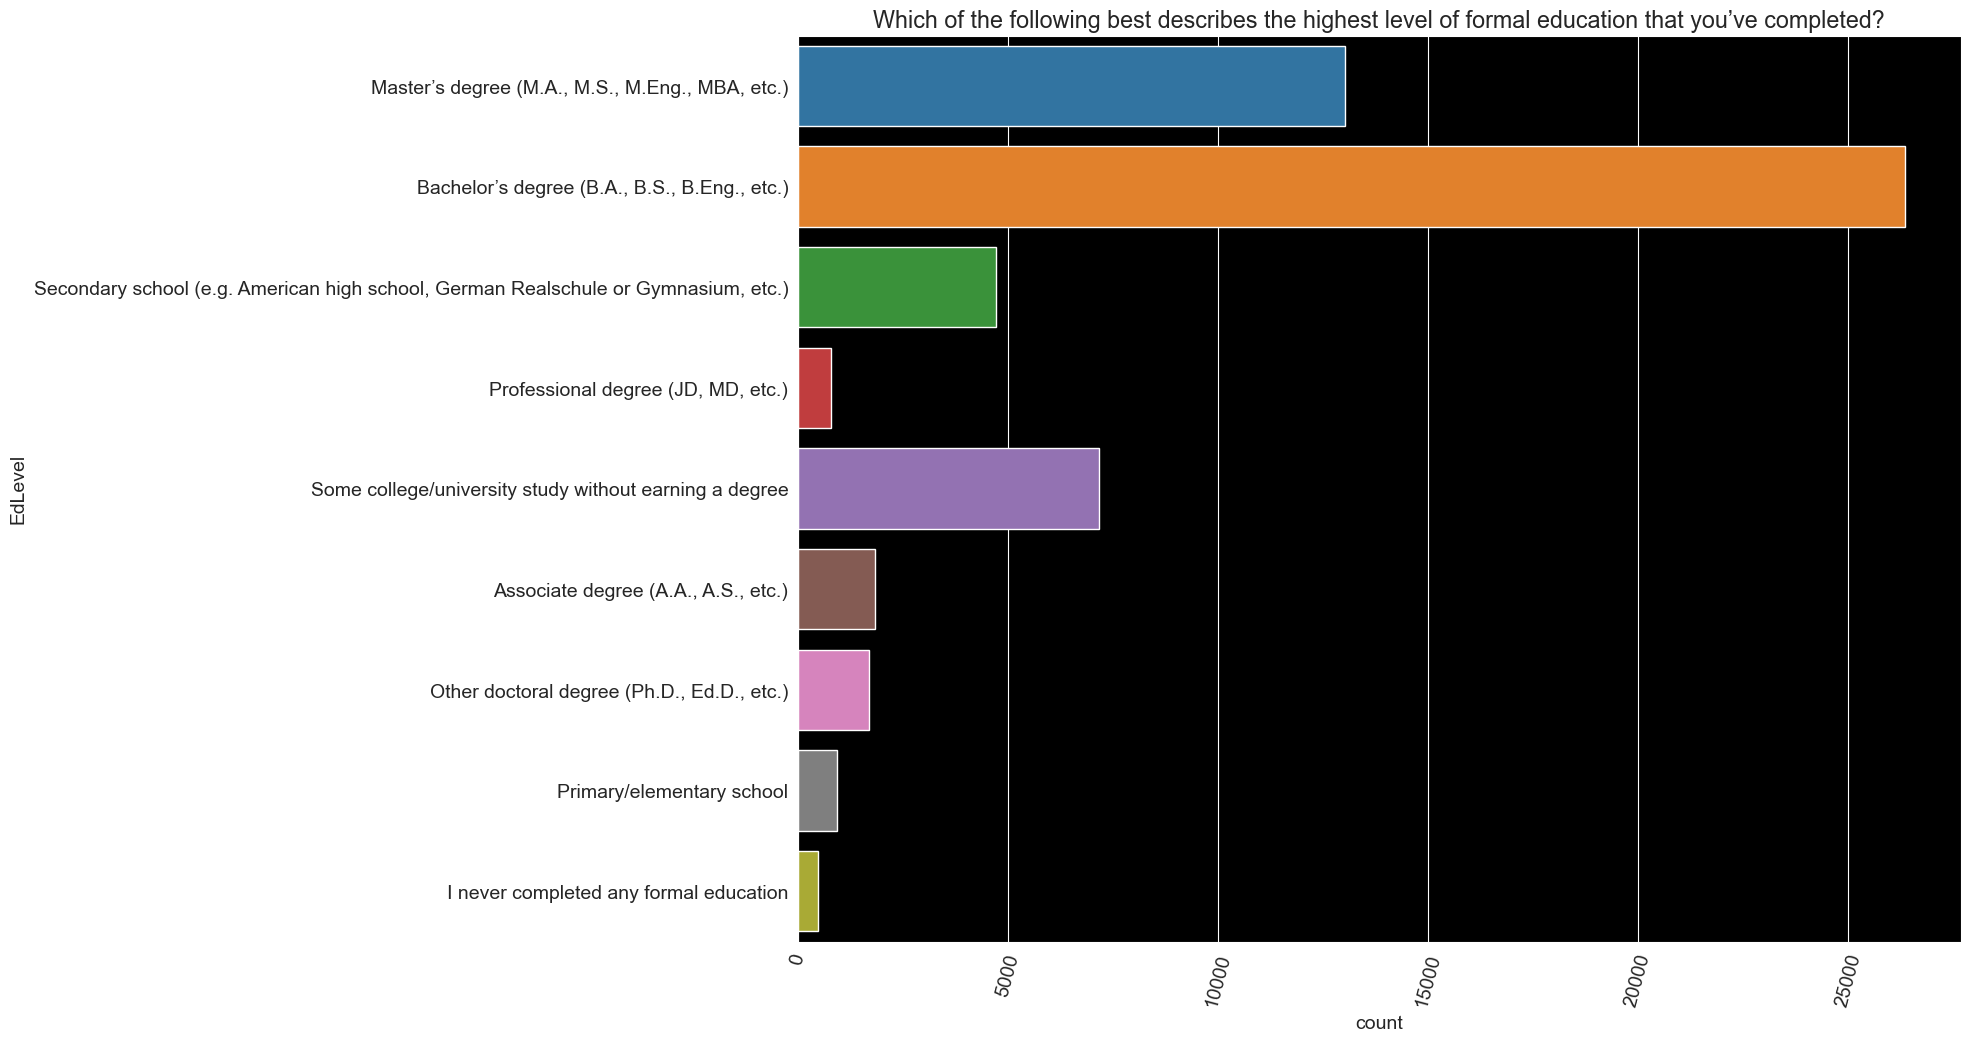

In [48]:
plt.figure(figsize=(15,12),dpi=100)
ax=plt.gca()
ax.set_facecolor('black')
sns.countplot(y=survey_df['EdLevel'])
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.show()

It appears that well over half of the respondents holds a bachelor's or master's degree, so most programmers definitely seem to have some college education, although it's not clear from this graph alone if they hold a degree in computer science. 

 Let's also plot undergraduate major's, but this time we'll convert the numbers into percentages, and sort it by percentage values to make it easier to visualize the order.

In [49]:
schema.UndergradMajor

'What was your primary field of study?'

In [50]:
Undergrad_pct=survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


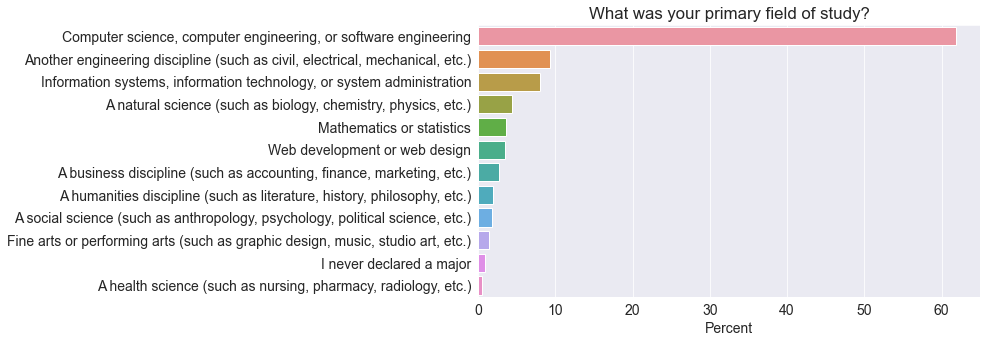

In [51]:
sns.barplot(Undergrad_pct,Undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel('Percent')
plt.show()

It turns that 40% of programmers holding a college degree have a feild of study other than computer science - which is very encouraging. This seems to suggest that while college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full time, part time & freelance work. Let's visualize the data from Employment column.

In [52]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

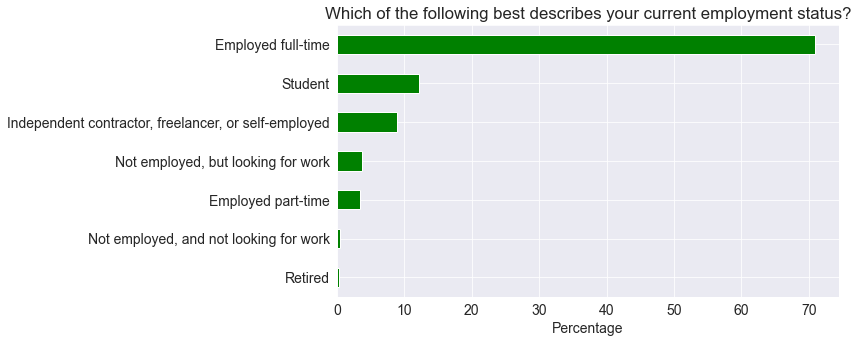

In [53]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage')

 It appears that close to 10% of respondents are employed part time or as freelancers.

### Developer Type

 DevType contains the information about the roles held by respondents.

In [54]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [55]:
survey_df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                4396
Developer, back-end                                                                                                                                                                                                                                                                  3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                       2214
Developer, back-end;Developer, full-stack                                                                                                                 

 Lets define a helper function which turns a column containing lists of values into a data frame with one column for each possible option.

In [56]:
def split_multicolumn(col_series):
    result_df=col_series.to_frame()
    options=[]
    #Iterate over columns
    for idx, value in col_series[col_series.notnull()].iteritems():
        #Break each value into list of options
        for option in value.split(';'):
            #Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option]=False
            #Mark the value in the option column as True
            result_df.at[idx,option]=True
    return result_df[options]

In [57]:
dev_type_df=split_multicolumn(survey_df.DevType)

In [58]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a respondent. If a responder has selected the option, the value in the column is True, otherwise it is False.
 We can now use the column wise totals to identify the most common roles. 

In [59]:
dev_type_totals=dev_type_df.sum().sort_values(ascending=False)

In [60]:
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include 'Developer' in the name.

### Asking and Answering Questions

We have already gained several insights about the respondents and the programming community in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

#### Q. What were the most popular languages in 2020? 

 To answer this, we can use LanguageWorkedWith column. 

In [61]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [62]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [63]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, We'll split this column into a data frame contaning a column of each languages listed in the options

In [64]:
languages_worked_df=split_multicolumn(survey_df.LanguageWorkedWith)

In [65]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


 It appears that a total of 25 languages were included among the options. Lets aggregate these to identify the percentage of respondents who selected each language.

In [66]:
languages_worked_percentages=languages_worked_df.mean().sort_values(ascending=False)*100

In [67]:
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


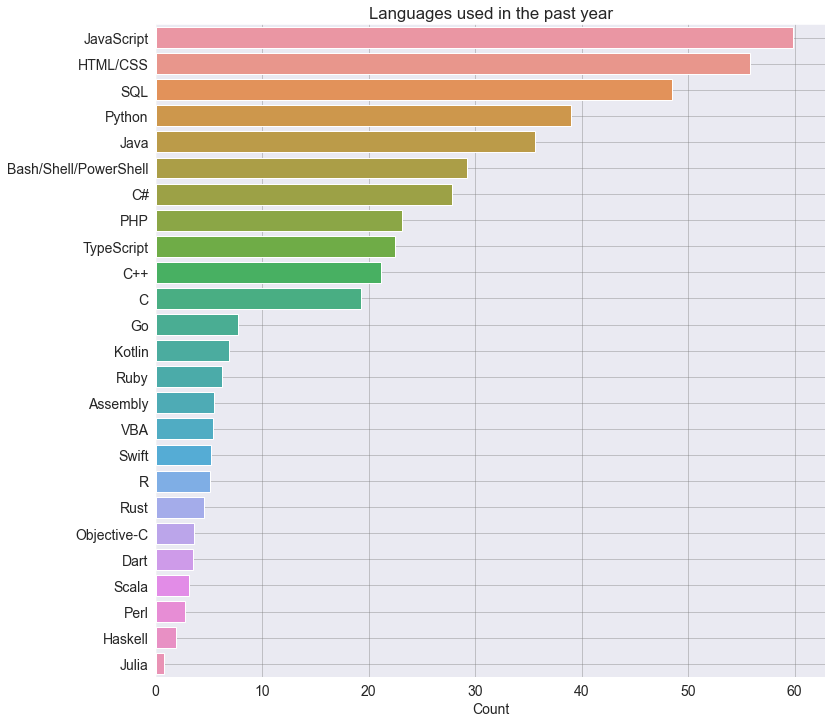

In [68]:
plt.figure(figsize=(12,12))
sns.barplot(languages_worked_percentages,languages_worked_percentages.index)
plt.title('Languages used in the past year')
plt.xlabel('Count')
plt.grid(color='gray',alpha=0.5)
plt.show()

 Perhaps not surprisingly, Javascript & HTML/CSS comes out at the top as web development is one of the most sought skills today and it also happens to be one of the easiest to get started with. SQL in necessary for working with relational databases, so its no surprise that most programmers work with SQL on regular basis. For other form of development, Python seems to be a popular choice, beating out java, which was the industry standard for server & application development for over 2 decades. 

#### Q. Which languages are the most people interested to learn over the next year?

For this we use the LanguagesDesireNextYear column, with similar processing as the previous one.

In [69]:
languages_intrested_df=split_multicolumn(survey_df.LanguageDesireNextYear)
languages_intrested_percentages=languages_intrested_df.mean().sort_values(ascending=False)*100
languages_intrested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


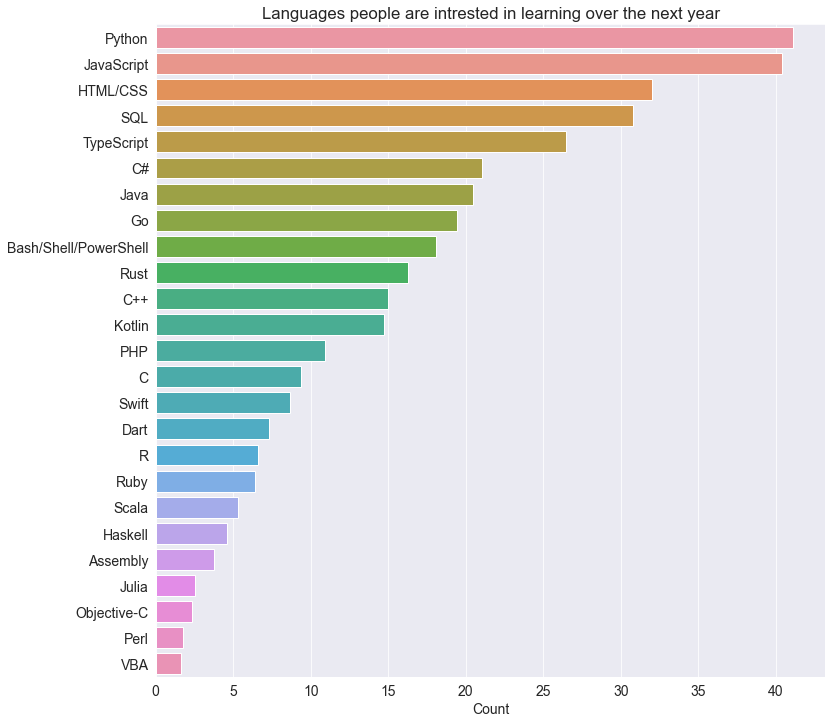

In [70]:
plt.figure(figsize=(12,12))
sns.barplot(languages_intrested_percentages,languages_intrested_percentages.index)
plt.title('Languages people are intrested in learning over the next year')
plt.xlabel('Count')
plt.show()

Once again, its not surprising that python is the language most people are intrested in learning- since it is an easy-to-learn general purpose programming language well suited for a variety of domains: application development, numeric computing, data analysis, machine learning etc. I am using python for this very analysis.

#### Q. Which are the most loved languagesi.e. a high percentage of people who have used the language want to continue learning & using it over the next year?

We can here use pandas array operation which will make it easy to work on the problem. Here what we can do:
- Create a new data frame language_loved_df which contains a True value for a language only if the corresponding values in languages_worked_df and languages_interested_df are both true.
- Take the column-wise sum of languages_loved_df and divide it by the columns-wise sum of languages_worked_df to get the percentage of respondents.
- Sort the result into descending order and plot a horizontal bar graph.

In [71]:
languages_loved_df=languages_worked_df & languages_intrested_df

In [72]:
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
languages_loved_percentages=(languages_loved_df.sum()*100/ languages_worked_df.sum()).sort_values(ascending=False)

In [74]:
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


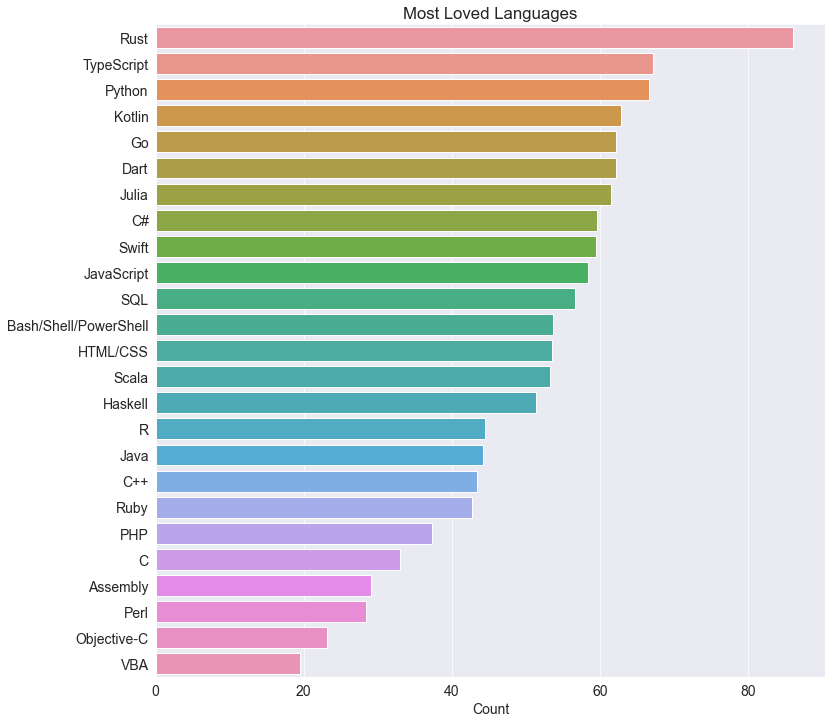

In [75]:
plt.figure(figsize=(12,12))
sns.barplot(languages_loved_percentages,languages_loved_percentages.index)
plt.title('Most Loved Languages')
plt.xlabel('Count')
plt.show()

Rust has been StackFlow's most loved languages for 4 years in a row, followed by typescript which has gained a lot of popularity in the past few years as a good alternative to javascript for web development.
 Python features number 3, despite being the one of the most widely used language in world

#### Q. In which contries do developers work the highest numbers of hours per week? Consider contries with more than 250 responses only.

To answer this question, we'll need to use the groupby dataframe method to aggregate the rows for each country. We'll also need to filter the results to only include the countries which have more than 250 respondents.

In [76]:
#Example
survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,46.500000,23.571429
Albania,43.962963,26.766667
Algeria,36.862069,28.019608
Andorra,42.000000,39.000000
Angola,24.500000,25.500000
...,...,...
"Venezuela, Bolivarian Republic of...",40.125000,29.090909
Viet Nam,41.391667,25.786585
Yemen,40.000000,31.000000


In [77]:
countries_df=survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)

In [78]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [79]:
high_response_countries_df=countries_df.loc[survey_df.Country.value_counts()>250].head(15)

In [80]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


 The Asian countries like Iran, China & Israel have the highest working hours, followed by the US. The average working hours seems to be 40 hours per week

#### Q. How important is it to start young to build a career in programming?

Here I create a scatter plot Age vs YearsCodePro to answer this question

In [81]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


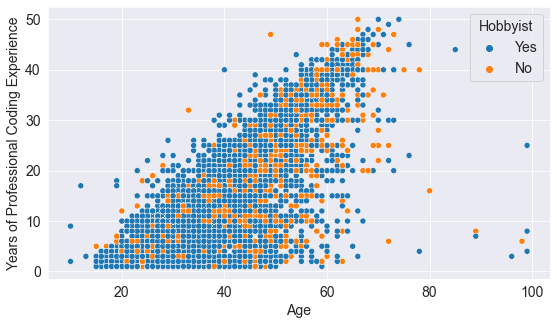

In [82]:
sns.scatterplot('Age','YearsCodePro',hue='Hobbyist',data=survey_df)
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.show()

You can see points all over the graph, which seems to indicate that you can start programming at any age. Also, many people have been coding for several decades professionally also seems to enjoy it as a hobby.

 We can also view the distribution of Age1stCode column to see when the respondents tried programming for the first time.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


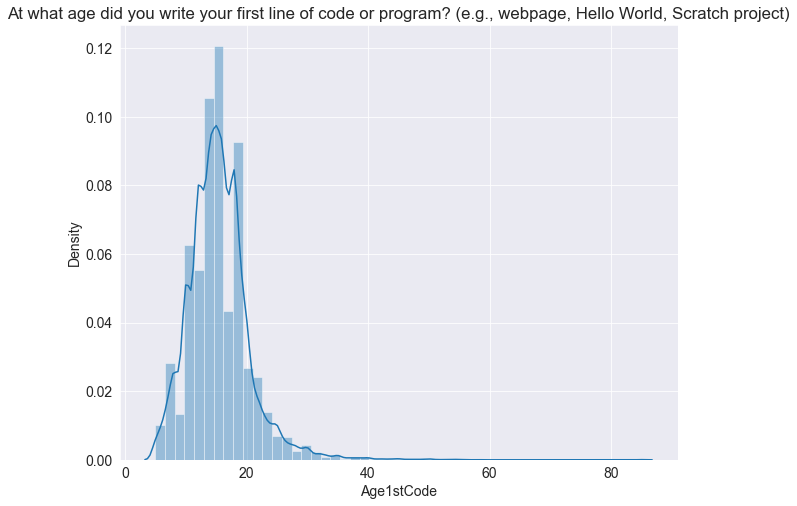

In [83]:
plt.figure(figsize=(10,8))
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode)
plt.show()

As you might expect, most people seem to have some exposure to programming before the age of 40, but there are people of all ages and walks of life who are learning to code.

### Inferences and Conclusions

I have drawn many interesting inferences from the survey, here's a summary of the few of them: 

- Based on the demographics of the survey respondents, we can infer that the survey is somewhat representative of the overall programming community, although its definitely has fewer responses from programmers in non-English speaking countries and from women and non binary gender.

- The programming community is not as diverse as it can be, and although things are improving, we should take more efforts to support & encourage members of underrepresented communities - whether it is in terms of age, country, race, gender or otherwise.

- Most programmers hold a college degree, although a fairly large percentile did not have computer science as a major in college, so a computer science degree isn't compulsory for learning to code or building a career in programming.

- A sigificant percentage of programmers either work part time or as a freelancer, and this can be a great way to break into the feild, especially when you are just getting started.

- Javascript and HTML/CSS are the most used programming languages in 2020, closesly followed by SQL and Python.

- Python is the language most people are intrested in learning - since it is easy to learn general purpose programming language well suited for variety of domains.

- Rust and TypeScript are the most loved languages in 2020, both of which have small but fast growing communities. Python is closed third, despite already being widely used language.

- Programmers around the world seems to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionlly at any age, and you are likely to have a long and fullfilling career if you also enjoy programming as a hobby.

### References and Future Work

There's a wealth of information to be discovered using the survey, and I've barely scratched the surface. Here are some ideas for future exploration:

- Repeat the analysis for different age groups & genders, and compare the results.

- Choose a different set of columns (I have chosen 20 out of 65) to analyze other facts of data.

- Prepare an analysis focuses on diversity - and identify areas where underrepresented communitites are at par with the majority (eg. education) and where they aren't (eg. salary).

- Compare the result of this year's survey with the previous years and identify intresting trends.

References:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey/2020

- Pandas User Guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

- Matplotlib User Guide: https://matplotlib.org/stable/users/index.html

- Seaborn User Guide: https://seaborn.pydata.org/tutorial.html

- opendatasets Python Libfrary: https://pypi.org/project/opendatasets/